# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [126]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | amderma
City not found. Skipping...
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | qasigiannguit
Processing Record 10 of Set 1 | hirara
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | labuhan
Processing Record 19 of Set 1 | nanortalik
Processing Record 20 of Set 1 | mancio lima
Processing Record 21 of Set 1 | savannah bight
Processing Record 22 

Processing Record 36 of Set 4 | pochutla
Processing Record 37 of Set 4 | provideniya
Processing Record 38 of Set 4 | yar-sale
Processing Record 39 of Set 4 | luanda
Processing Record 40 of Set 4 | placido de castro
Processing Record 41 of Set 4 | elbrus
Processing Record 42 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 43 of Set 4 | san juan de uraba
Processing Record 44 of Set 4 | saint marys
Processing Record 45 of Set 4 | flinders
Processing Record 46 of Set 4 | coquimbo
Processing Record 47 of Set 4 | severo-kurilsk
Processing Record 48 of Set 4 | gat
Processing Record 49 of Set 4 | saint anthony
Processing Record 0 of Set 5 | lokken verk
City not found. Skipping...
Processing Record 1 of Set 5 | tefe
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | dolinsk
Processing Record 4 of Set 5 | cherskiy
Processing Record 5 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 5 | ponta do sol
Processing Record 7 of Se

Processing Record 25 of Set 8 | bouna
Processing Record 26 of Set 8 | port hardy
Processing Record 27 of Set 8 | ola
Processing Record 28 of Set 8 | tromso
Processing Record 29 of Set 8 | sao joao da barra
Processing Record 30 of Set 8 | gouyave
Processing Record 31 of Set 8 | chicama
Processing Record 32 of Set 8 | kaeo
Processing Record 33 of Set 8 | maceio
Processing Record 34 of Set 8 | marshall
Processing Record 35 of Set 8 | palmer
Processing Record 36 of Set 8 | mecca
Processing Record 37 of Set 8 | marawi
Processing Record 38 of Set 8 | panzhihua
Processing Record 39 of Set 8 | sulina
Processing Record 40 of Set 8 | la poza
Processing Record 41 of Set 8 | nha trang
Processing Record 42 of Set 8 | bakel
Processing Record 43 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 44 of Set 8 | krasnogvardeyskiy
Processing Record 45 of Set 8 | mahibadhoo
Processing Record 46 of Set 8 | college
Processing Record 47 of Set 8 | mountain home
Processing Record 48 of Set 8 | c

Processing Record 15 of Set 12 | rocha
Processing Record 16 of Set 12 | ugoofaaru
Processing Record 17 of Set 12 | pouebo
Processing Record 18 of Set 12 | port hawkesbury
Processing Record 19 of Set 12 | konevo
Processing Record 20 of Set 12 | namie
Processing Record 21 of Set 12 | chimbote
Processing Record 22 of Set 12 | homer
Processing Record 23 of Set 12 | krasnik
Processing Record 24 of Set 12 | plettenberg bay
Processing Record 25 of Set 12 | yei
Processing Record 26 of Set 12 | novopavlovka
Processing Record 27 of Set 12 | thinadhoo
Processing Record 28 of Set 12 | hjelset
Processing Record 29 of Set 12 | dalbandin
Processing Record 30 of Set 12 | mackenzie
Processing Record 31 of Set 12 | muisne
Processing Record 32 of Set 12 | havre-saint-pierre
Processing Record 33 of Set 12 | greymouth
Processing Record 34 of Set 12 | laon
Processing Record 35 of Set 12 | marsa matruh
Processing Record 36 of Set 12 | nosy varika
Processing Record 37 of Set 12 | ishigaki
Processing Record 38

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,64.17,85,98,9.84,NZ,1675530608
1,torbay,47.6666,-52.7314,12.58,71,75,34.52,CA,1675530599
2,saint-philippe,-21.3585,55.7679,80.19,88,67,12.06,RE,1675530645
3,tasiilaq,65.6145,-37.6368,24.96,95,97,8.72,GL,1675530836
4,cape town,-33.9258,18.4232,77.88,68,4,5.99,ZA,1675530748


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,64.17,85,98,9.84,NZ,1675530608
1,torbay,47.6666,-52.7314,12.58,71,75,34.52,CA,1675530599
2,saint-philippe,-21.3585,55.7679,80.19,88,67,12.06,RE,1675530645
3,tasiilaq,65.6145,-37.6368,24.96,95,97,8.72,GL,1675530836
4,cape town,-33.9258,18.4232,77.88,68,4,5.99,ZA,1675530748


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

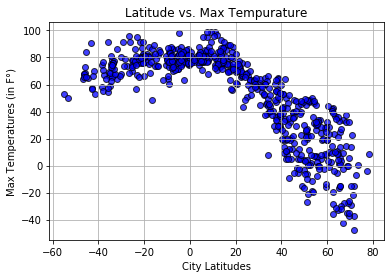

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Max Tempurature")
plt.xlabel("City Latitudes")
plt.ylabel("Max Temperatures (in F°)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

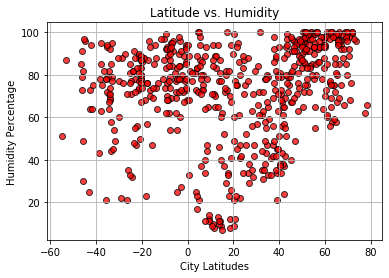

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="red", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("City Latitudes")
plt.ylabel("Humidity Percentage")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_Hmdty.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

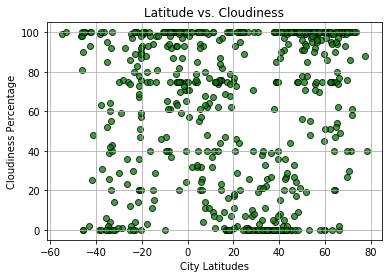

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="green", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("City Latitudes")
plt.ylabel("Cloudiness Percentage")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

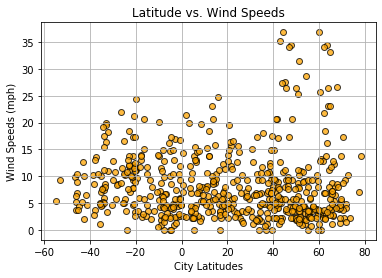

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="orange", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speeds")
plt.xlabel("City Latitudes")
plt.ylabel("Wind Speeds (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,torbay,47.6666,-52.7314,12.58,71,75,34.52,CA,1675530599
3,tasiilaq,65.6145,-37.6368,24.96,95,97,8.72,GL,1675530836
6,barrow,71.2906,-156.7887,-21.98,76,40,9.22,US,1675530939
7,qasigiannguit,68.8193,-51.1922,-0.15,97,100,3.98,GL,1675530937
8,hirara,24.8000,125.2833,68.68,71,89,15.57,JP,1675530762


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,64.17,85,98,9.84,NZ,1675530608
2,saint-philippe,-21.3585,55.7679,80.19,88,67,12.06,RE,1675530645
4,cape town,-33.9258,18.4232,77.88,68,4,5.99,ZA,1675530748
5,hermanus,-34.4187,19.2345,80.80,82,39,5.28,ZA,1675530957
9,bredasdorp,-34.5322,20.0403,75.42,71,1,7.83,ZA,1675530959


###  Temperature vs. Latitude Linear Regression Plot

The line regression for the Northern Hemisphere is y =-1.43x +95.31
The r-value is: -0.8639375830998954
The r-squared value is: 0.7463881474924887
The correlation between latitude and the maximum temperature is strongly negative for the Northern Hemisphere.
The further you go from the equator, the maximum temperature decreases.


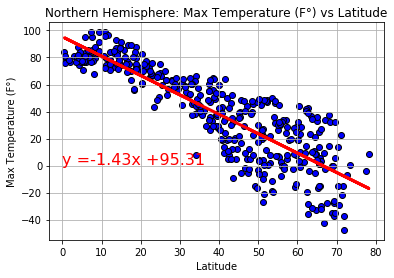

In [108]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq1 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Northern Hemisphere: Max Temperature (F°) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F°)")
plt.annotate(line_eq1, (0,1), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Northern Temp vs Lat")

print(f"The line regression for the Northern Hemisphere is {line_eq1}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and the maximum temperature is strongly negative for the Northern Hemisphere.")
print("The further you go from the equator, the maximum temperature decreases.")

The line regression for the southern Hemisphere is y =0.29x +81.78
The r-value is: 0.44622165013728504
The r-squared value is: 0.19911376105124162
The correlation between latitude and maximum temperature is moderately positive for the Southern Hemisphere.
The closer a city is to the equator results in a higher maximum temperature.


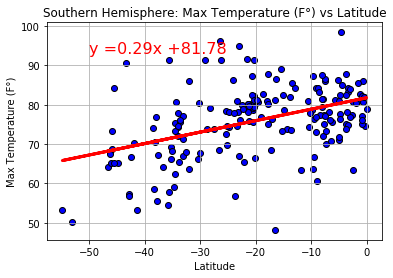

In [107]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq2 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Southern Hemisphere: Max Temperature (F°) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F°)")
plt.annotate(line_eq2, (-50,93), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Southern Temp vs Lat")

print(f"The line regression for the southern Hemisphere is {line_eq2}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and maximum temperature is moderately positive for the Southern Hemisphere.")
print("The closer a city is to the equator results in a higher maximum temperature.")

### Humidity vs. Latitude Linear Regression Plot

The line regression for the Northern Hemisphere is y =0.56x +50.12
The r-value is: 0.4612454710608962
The r-squared value is: 0.21274738457418804
The correlation between latitude and the humidity is positive for the Northern Hemisphere.
The regression line does not show much correlation of the data.


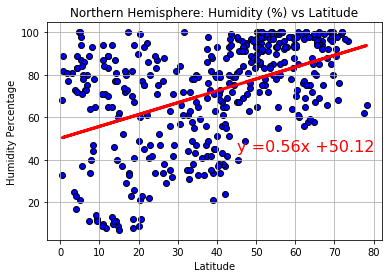

In [121]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq3 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Northern Hemisphere: Humidity (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage")
plt.annotate(line_eq3, (45,44), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Northern Humidity vs Lat")

print(f"The line regression for the Northern Hemisphere is {line_eq3}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and the humidity is positive for the Northern Hemisphere.")
print("The regression line does not show much correlation of the data.")

The line regression for the Southern Hemisphere is y =0.24x +79.76
The r-value is: 0.19012699668352873
The r-squared value is: 0.036148274867898546
The correlation between latitude and the humidity is very weakly positive for the southern Hemisphere.
The regression line does not show much correlation of the data.


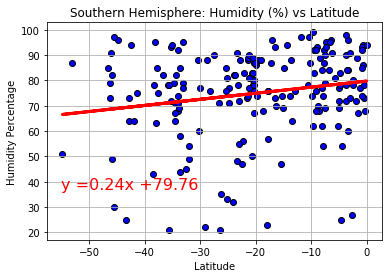

In [105]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq4 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Southern Hemisphere: Humidity (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage")
plt.annotate(line_eq4, (-55,37), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Southern Humidity vs Lat")

print(f"The line regression for the Southern Hemisphere is {line_eq4}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and the humidity is very weakly positive for the southern Hemisphere.")
print("The regression line does not show much correlation of the data.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The line regression for the Northern Hemisphere is y =0.49x +40.47
The r-value is: 0.25335476929764555
The r-squared value is: 0.0641886391258632
The correlation between latitude and the cloudiness is positive for the Northern Hemisphere.
The regression line does not show much correlation, cloudiness percentage ranges 0-100% all over the hemisphere.


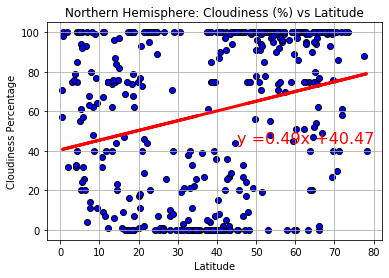

In [119]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq5 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Northern Hemisphere: Cloudiness (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness Percentage")
plt.annotate(line_eq5, (45,44), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Northern Cloudiness vs Lat")

print(f"The line regression for the Northern Hemisphere is {line_eq5}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and the cloudiness is positive for the Northern Hemisphere.")
print("The regression line does not show much correlation, cloudiness percentage ranges 0-100% all over the hemisphere.")

The line regression for the Southern Hemisphere is y =0.74x +79.91
The r-value is: 0.28398293769283767
The r-squared value is: 0.08064630890065412
The correlation between latitude and the cloudiness is positive for the southern Hemisphere.
The regression line does not show much correlation, cloudiness percentage ranges 0-100% all over the hemisphere.


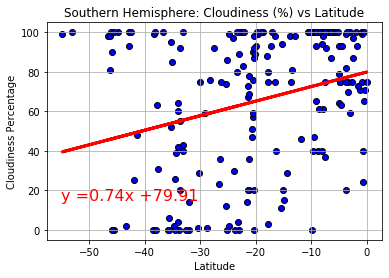

In [120]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq6 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Southern Hemisphere: Cloudiness (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness Percentage")
plt.annotate(line_eq6, (-55,15), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Southern Cloudiness vs Lat")

print(f"The line regression for the Southern Hemisphere is {line_eq6}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and the cloudiness is positive for the southern Hemisphere.")
print("The regression line does not show much correlation, cloudiness percentage ranges 0-100% all over the hemisphere.")

### Wind Speed vs. Latitude Linear Regression Plot

The line regression for the Northern Hemisphere is y =0.0x +7.92
The r-value is: 0.013164546860510419
The r-squared value is: 0.00017330529404257472
The correlation between latitude and the wind speeds is about non-existent for the Northern Hemisphere.
The regression line does not show much correlation, wind speed is mainlu prevalant between 0-10 mph all over the hemisphere.


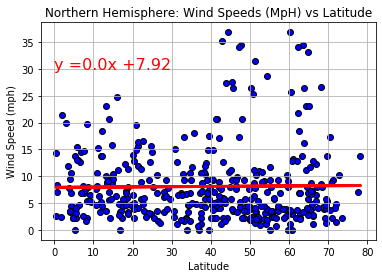

In [118]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq7 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Northern Hemisphere: Wind Speeds (MpH) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq7, (0,30), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Northern Wind Speed vs Lat")

print(f"The line regression for the Northern Hemisphere is {line_eq7}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and the wind speeds is about non-existent for the Northern Hemisphere.")
print("The regression line does not show much correlation, wind speed is mainly prevalant between 0-10 mph all over the hemisphere.")

The line regression for the Southern Hemisphere is y =-0.05x +7.46
The r-value is: -0.1252496982951112
The r-squared value is: 0.015687486923016383
The correlation between latitude and the wind speeds shows a very weak negative for the Southern Hemisphere.
The regression line does not show much correlation, wind speed is all over the hemisphere.


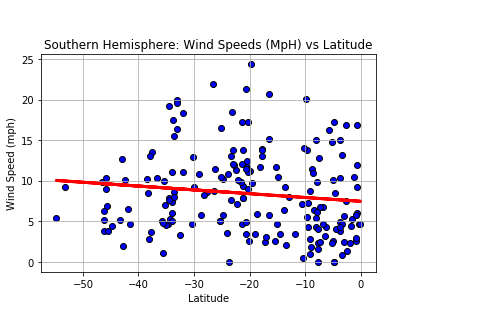

In [123]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept

line_eq8 = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_value, y_value, marker='o', color='blue', edgecolors='black')
plt.plot(x_value, regression, color='red', linewidth=3)

plt.title("Southern Hemisphere: Wind Speeds (MpH) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq8, (0,30), fontsize=16, color="red")
plt.grid(True)

plt.savefig("../output_data/Southern Wind Speed vs Lat")

print(f"The line regression for the Southern Hemisphere is {line_eq8}")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
print("The correlation between latitude and the wind speeds shows a very weak negative for the Southern Hemisphere.")
print("The regression line does not show much correlation, wind speed is all over the hemisphere.")